In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sympy.ntheory import isprime, quadratic_residues
#from tqdm import tqdm

## MURA

In [2]:
m = np.arange(1,100)
L = 4 * m + 1
L

array([  5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,  53,
        57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101, 105,
       109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157,
       161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209,
       213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257, 261,
       265, 269, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 313,
       317, 321, 325, 329, 333, 337, 341, 345, 349, 353, 357, 361, 365,
       369, 373, 377, 381, 385, 389, 393, 397])

In [6]:
def is_prime(n):
    if n % 2 == 0 and n > 2: 
        return False
    return all(n % i for i in range(3, int(sqrt(n)) + 1, 2))

def keep_primes(vec_m):
    foo = np.vectorize(is_prime)
    pbools = foo(vec_m)
    primes = np.extract(pbools, vec_m)
    return primes

keep_primes(L)

array([  5,  13,  17,  29,  37,  41,  53,  61,  73,  89,  97, 101, 109,
       113, 137, 149, 157, 173, 181, 193, 197, 229, 233, 241, 257, 269,
       277, 281, 293, 313, 317, 337, 349, 353, 373, 389, 397])

In [7]:
def squarepattern(p):
    if not isprime(p):
        raise ValueError("p is not a valid length. It must be prime.")
    A = np.zeros((p, p), dtype=int)
    q = quadratic_residues(p)
    A[1:, 0] = 1
    for j in range(1, p):
        for i in range(1, p):
            if not ((i - 1 in q) != (j - 1 in q)):
                A[i, j] = 1
    return A

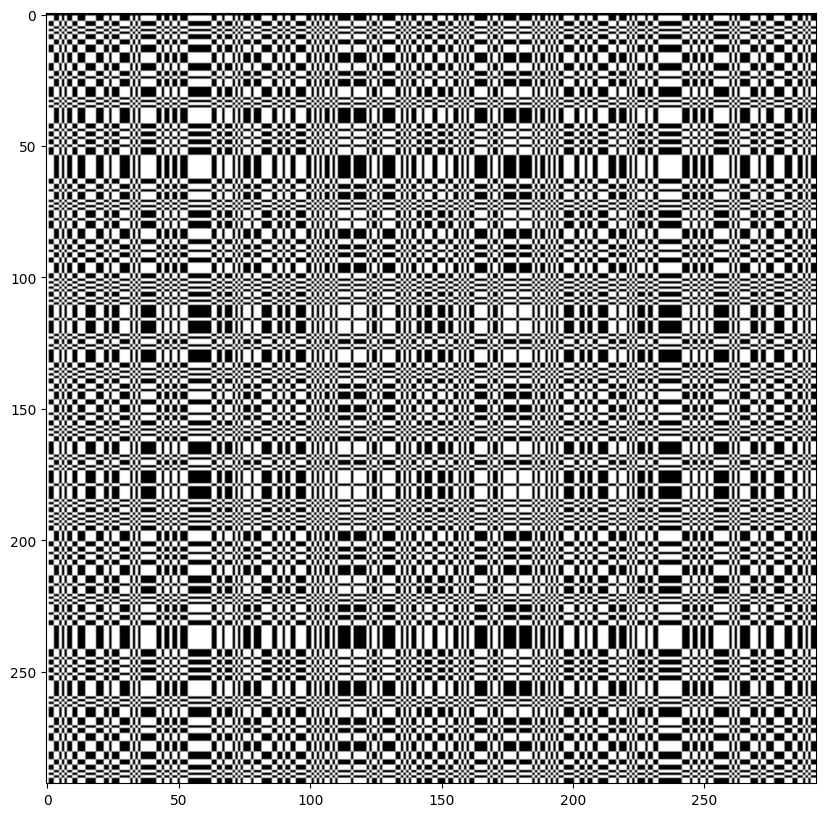

In [13]:
l = 293
A = squarepattern(l)
plt.figure(figsize=(10,10))
plt.imshow(A, cmap='Greys_r')

In [14]:
np.save(f'MURA_{l}.npy', A)